In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('admitance.csv')

In [3]:
dataset

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
dataset['Admitted'] = dataset['Admitted'].map({'Yes':1,'No':0})

In [5]:
dataset

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


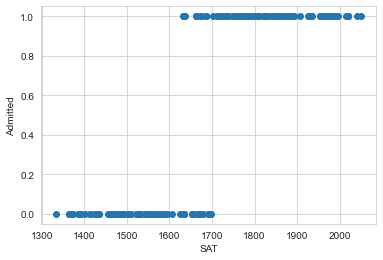

In [6]:
plt.scatter(dataset['SAT'],dataset['Admitted'])
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [7]:
import statsmodels.api as sm

In [8]:
y = dataset['Admitted']

In [9]:
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [10]:
x1 = dataset['SAT']

In [11]:
x1

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

In [12]:
x = sm.add_constant(x1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
x

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [14]:
result_lin = sm.OLS(y,x).fit()

In [15]:
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           2.98e-43
Time:                        16:53:55   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

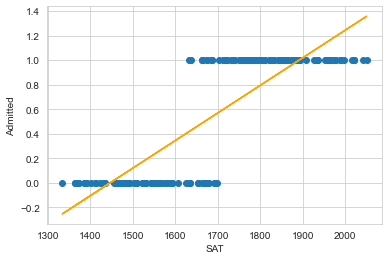

In [16]:
plt.scatter(dataset['SAT'],dataset['Admitted'])
plt.plot(x1,result_lin.predict(x),color='orange')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [17]:
# Logistic Reg

In [18]:
result_log = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [20]:
def surbhi(a):
    return a**3

In [22]:
surbhi(5)

125

In [ ]:
def f(x1,b0,b1):
    return np.array(np.exp(b0+b1*x1)/(1+np.exp(b0+b1*x1)))

In [19]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.7992
Time:                        16:59:37   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
result_log.params

In [ ]:
result_log.params[0]

In [ ]:
result_log.params[1]

In [ ]:
y_sorted = np.sort(f(x1,result_log.params[0],result_log.params[1]))

In [ ]:
y_sorted.round()

In [ ]:
x_sorted = np.sort(np.array(x1))

In [ ]:
x_sorted

In [ ]:
plt.scatter(dataset['SAT'],dataset['Admitted'])
plt.plot(x_sorted,y_sorted,color='red')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()